# House Prices Prediction

Predict sales price for each house.

## importing libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the data set

In [71]:
house_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")

## Exploratory Data Analysis

### Data wrangling and manipulation

#### Data Understanding

In [72]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [74]:
print(house_data.columns, "\n{} Columns".format(len(house_data.columns)))


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The dataset has 81 columns

Our target variable is `SalePrice` the rest are our predictor variables

In [75]:
# let's look at the information about the variable

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 1460 columns in the dataset.
Some variables have `nan` values which means the have empty values.
We can see the data types of each variable.
We have 81 columns/variable

Our target variable `SalePrice` luckily has zero null values thus this won't be affecting our ML model

Some variables, however, have extremely few `non-null` values.
This makes them impossible to use since we can gather very limited insights from them.

We can therefore drop them:-

We drop
- `Alley`
- `FireplaceQu`
- `PoolQC`

In [76]:
house_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscVal', 'MiscFeature'], axis=1, inplace=True)
print(house_data.shape)

(1460, 75)


We now have 75 columns to work with

In [77]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000


This shows the summary statistics of numerical columns.<br>
There are 37 columns with numerical values.<br>
From the summary statistics we can see the:-
- number of rows in a variable which are `not-null`
- mean of the variable
- standard deviation of the variable
- the minimum value in the variable
- the quantiles
- the maximum value in the variable

In [78]:
# let's see the number of null values in the variables
house_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

we can see that most of the columns do not have null values

In [79]:
house_data.fillna(house_data.median(), inplace=True)

/tmp/ipykernel_105696/4048726261.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_data.fillna(house_data.median(), inplace=True)


In [80]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

We've only filled the numerical variables

Let's handle the categorical variables too

In [81]:
house_data.fillna(house_data.mode().iloc[0], inplace=True)

In [82]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

we've now handled missing values in the dataset

#### understanding the target variable

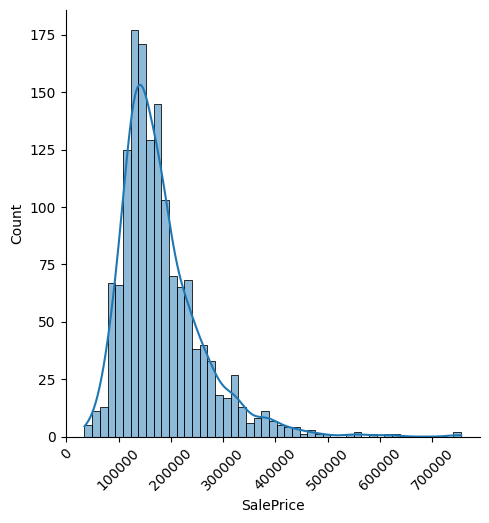

In [83]:
sns.displot(house_data['SalePrice'], kde=True)
plt.xticks(rotation=45)
plt.show()

In [84]:
from scipy.stats import skew
skewness = skew(house_data['SalePrice'])
print("Skewness:- ", skewness)


Skewness:-  1.880940746034036


The variable is positively skewed and has a skew of 1.88

In [85]:
from scipy.stats import kurtosis

kurt = kurtosis(house_data['SalePrice'])
print('Kurtosis:- ', kurt)

Kurtosis:-  6.509812011089439


The distribution is leptokurtic since it has a `kurtosis` of > 3 (6.5)

Let's understand the correlation of each variable with the target variable to decide the most relevant features in the dataset

/tmp/ipykernel_105696/3826597236.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_data.corr(), square=True)


<AxesSubplot: >

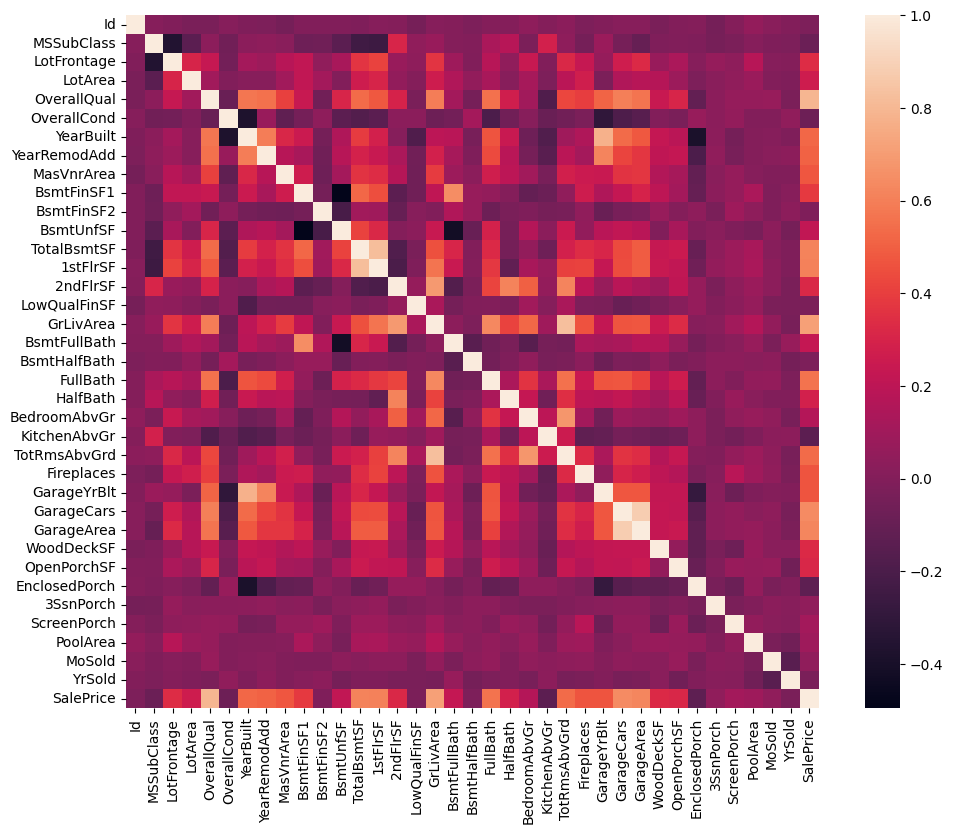

In [86]:
plt.subplots(figsize=(12,9))
sns.heatmap(house_data.corr(), square=True)

From the matrix we identify the following variable that have a high correlation with the target variable

OverallQual, GrLivArea, GarageCars, GarageArea, TotalBmstSF

In [87]:
import numpy as np
def vars_corrHigh(dataframe, target_var):
    cor_matrix = dataframe.corr(numeric_only=True)
    vars = cor_matrix[abs(cor_matrix[target_var]) > 0.5].index.tolist() 
    vars = vars + (cor_matrix[abs(cor_matrix[target_var]) <= -0.5].index.tolist())
 
    
    return vars

target = 'SalePrice'
var_list = vars_corrHigh(house_data, target)
print(var_list)
print(len(var_list))

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
11


The 10 columns above have a high correlation with the target variable.

We are going to consinder them hence dropping the others

In [88]:
house_data = house_data[var_list]
print(house_data.columns)
var_list1 = var_list.pop()


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


In [89]:
test_data = test_data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   TotalBsmtSF   1458 non-null   float64
 4   1stFlrSF      1459 non-null   int64  
 5   GrLivArea     1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   GarageCars    1458 non-null   float64
 9   GarageArea    1458 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


In [91]:
test_data.fillna(test_data.mean(), inplace=True)

In [92]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   TotalBsmtSF   1459 non-null   float64
 4   1stFlrSF      1459 non-null   int64  
 5   GrLivArea     1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   GarageCars    1459 non-null   float64
 9   GarageArea    1459 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


In [93]:
house_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [94]:
test_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0


There's an important thing that happened, we've just lost all the categorical variables

We'll later consider transforming them and choose another model

let's continue and view the correlation matrix

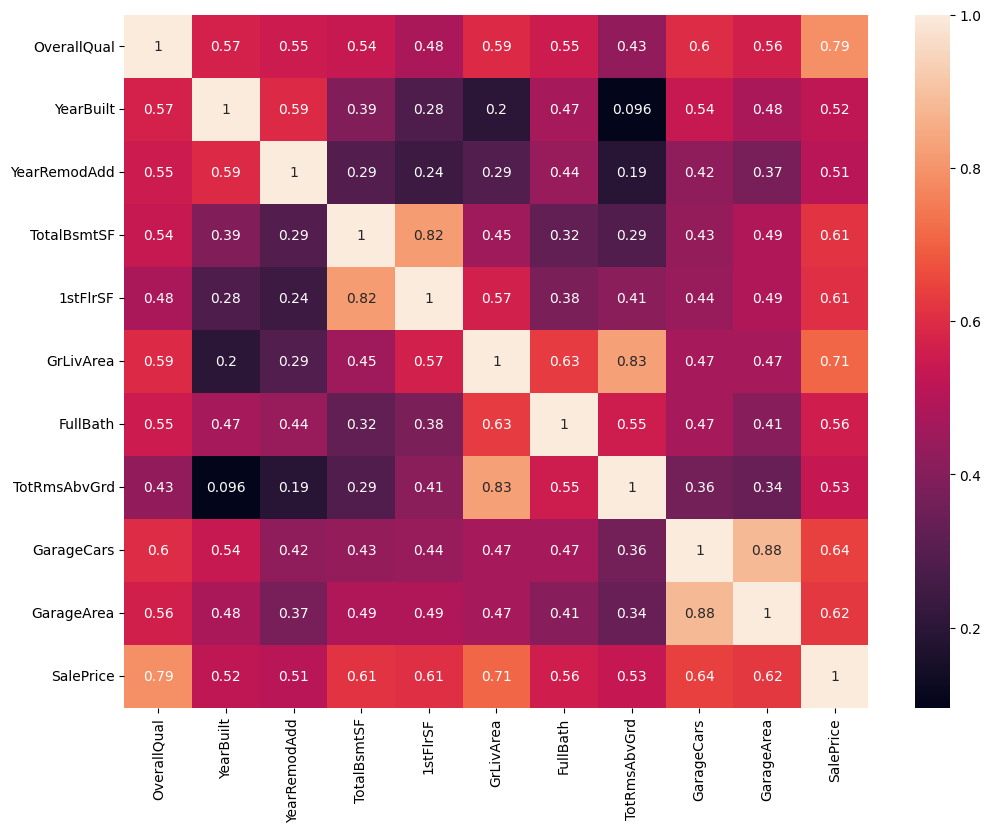

In [95]:
plt.subplots(figsize=(12, 9))
sns.heatmap(house_data.corr(), annot=True)
plt.show()

Here is the correlation matrix of the variables that have a correlation of  >= 0.5 with the target variable `SalePrice`


### Graphical Analysis

### Univariate analysis
Let's see the univariate analysis of the variables

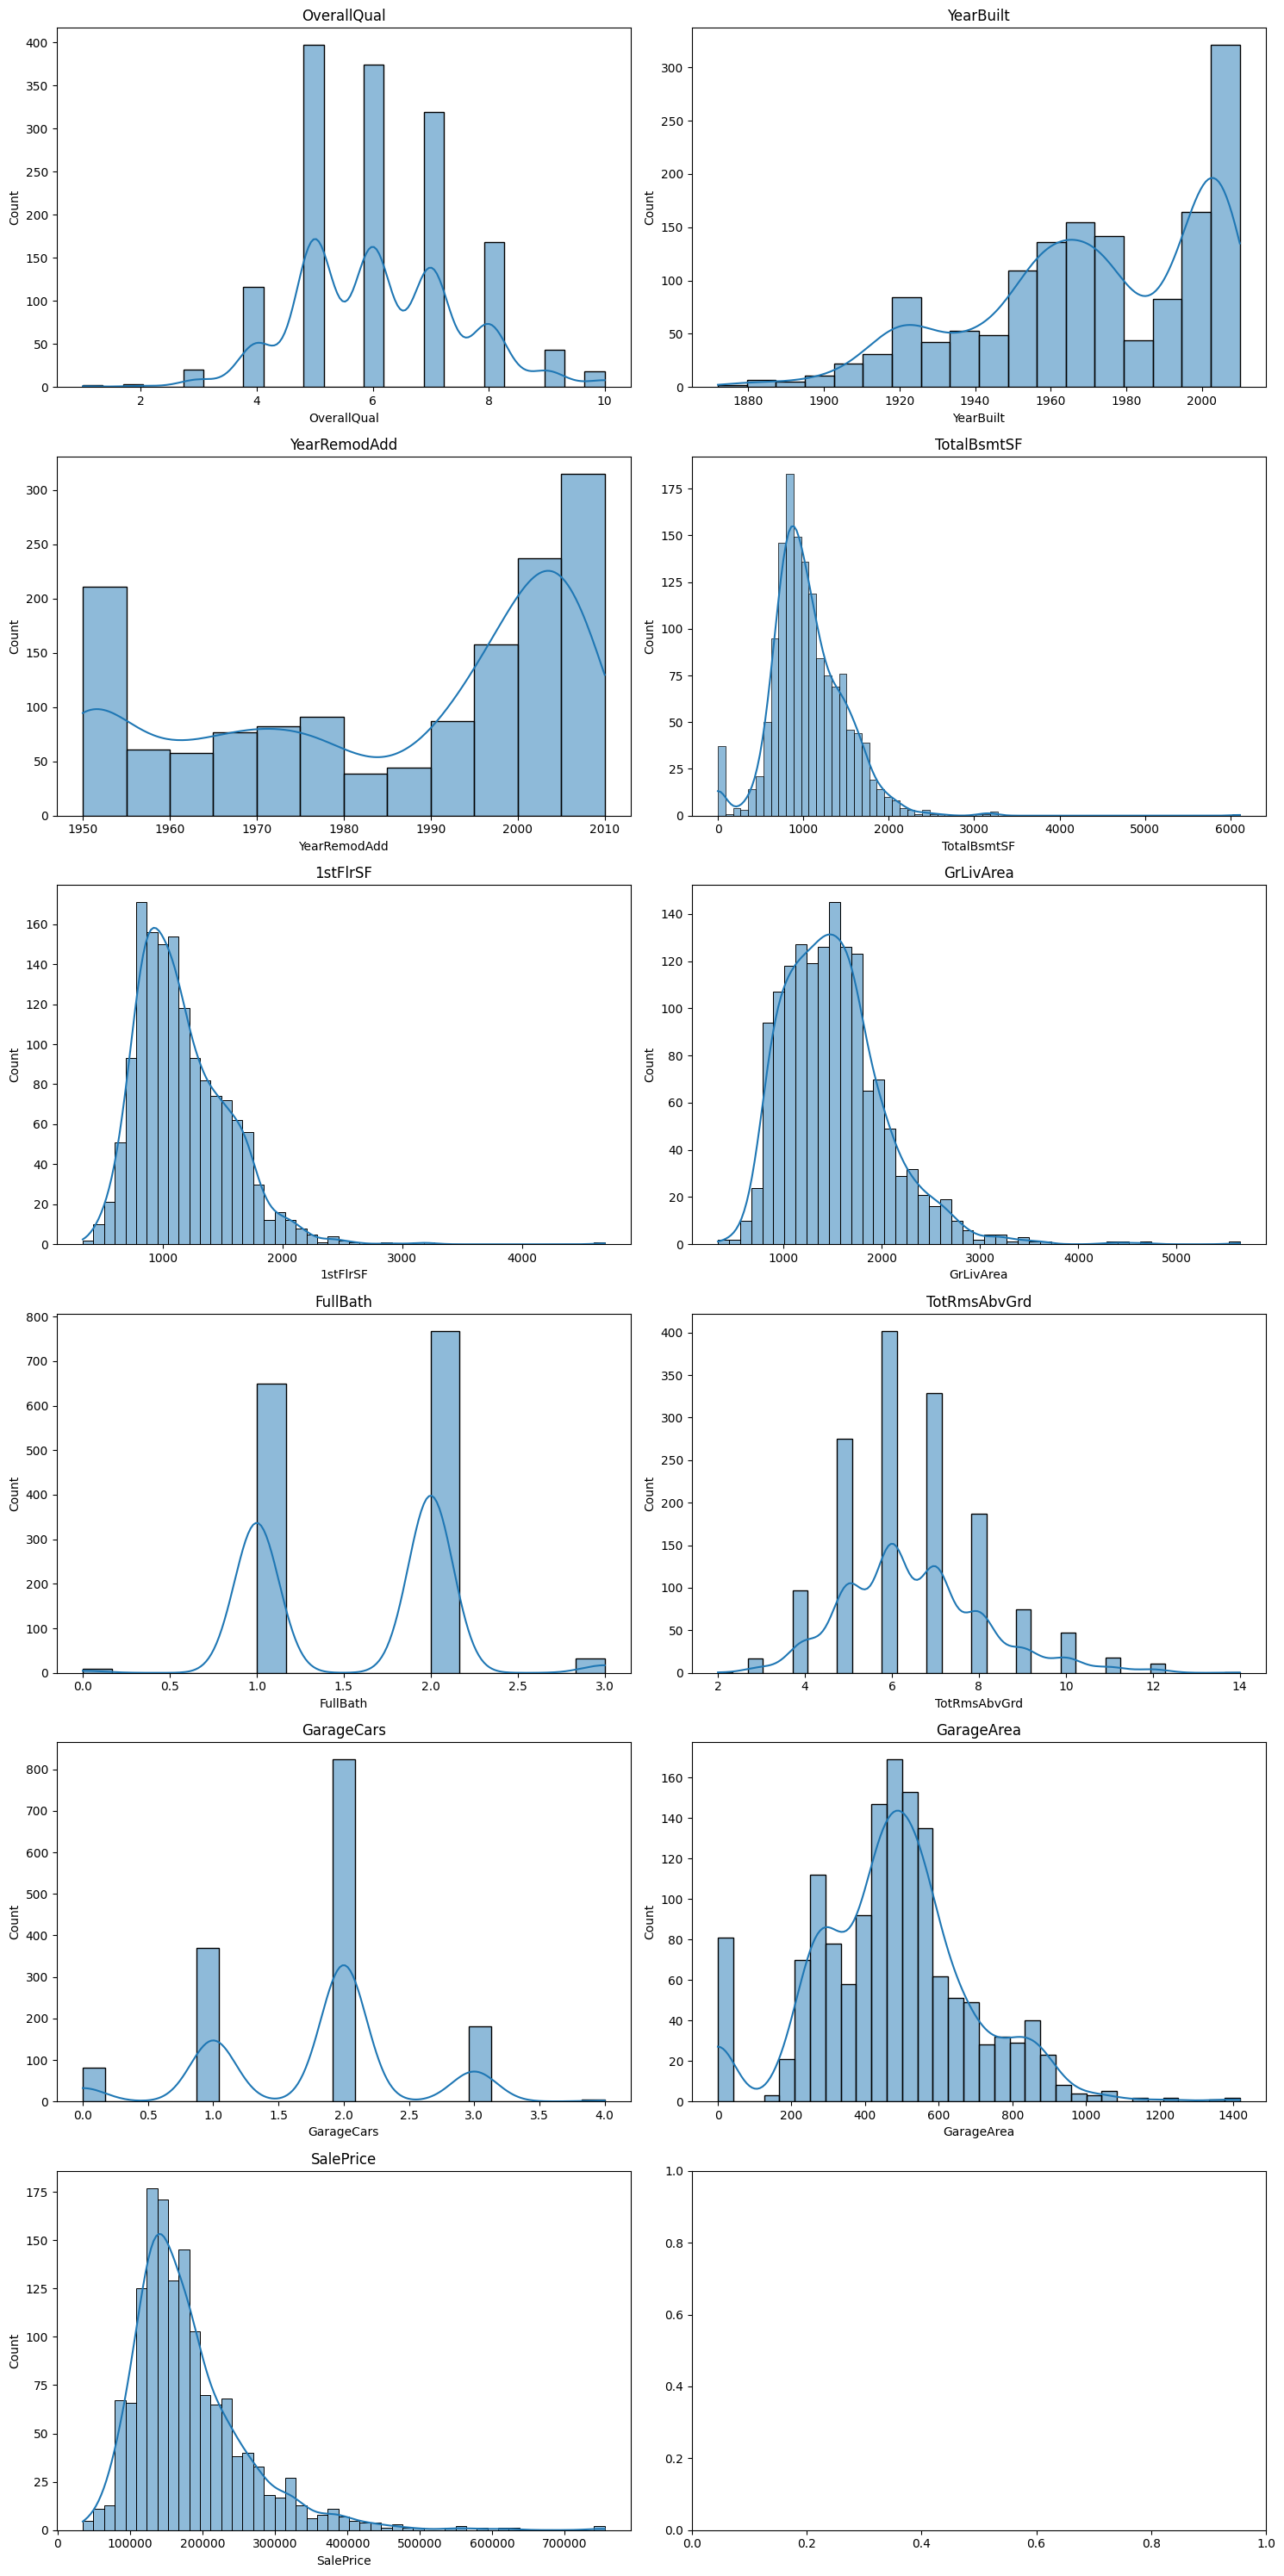

In [96]:
cols= 2
num_vars = len(house_data.columns)
num_rows = 6

fig, axes = plt.subplots(nrows=len(house_data.columns)// cols + 1, ncols=cols, figsize=(15, 5*num_rows))

for i, column in enumerate(house_data.columns):
    row = i // cols
    col = i % cols
    
    sns.histplot(data=house_data, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')

plt.tight_layout()

plt.show()

From the above plots above we can see the distributions of each variable in the dataset.
Some are normally distributed, others are positively and negatively skewed and some have leptokurtic kurtosis.<br>

We will revisit this later.




### Bivariate analysis

Let's now see how the predictor variables relate with the target variable `SalePrice`<br>

We will use scatterplot to visualize the relationships

In [97]:
predictor_variables = house_data.columns
#predictor_variables.pop()
print(predictor_variables)


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


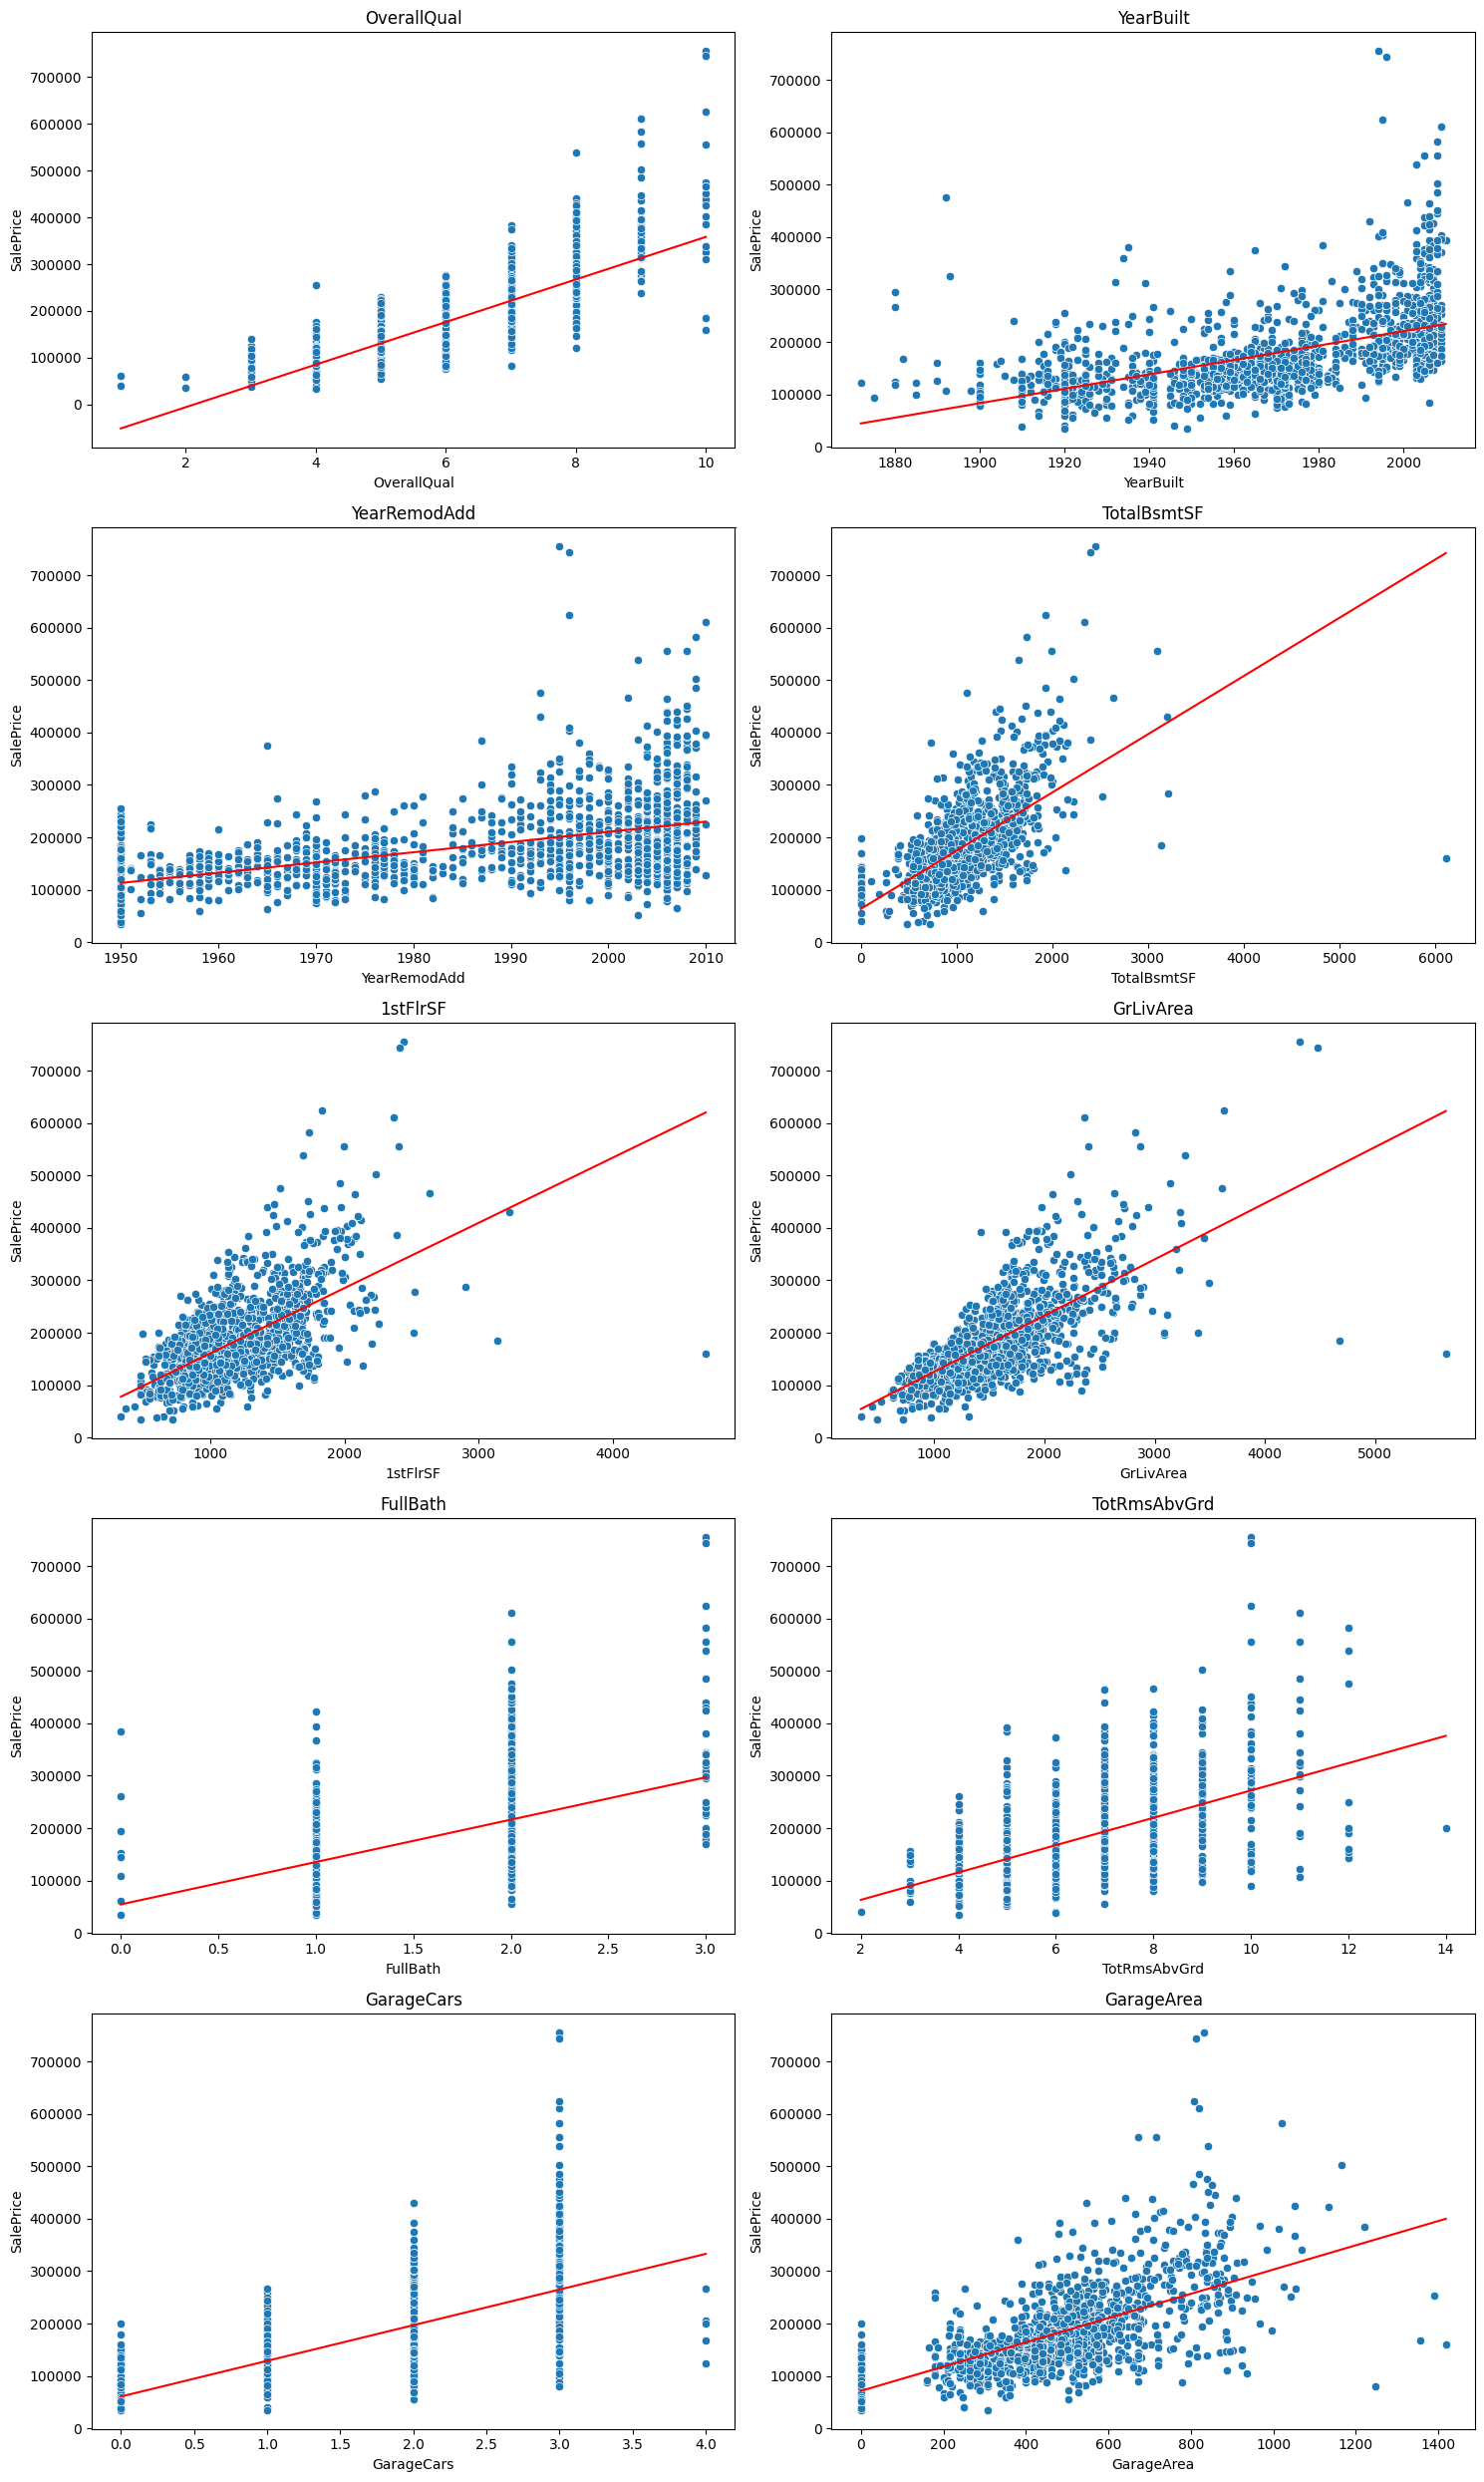

In [98]:
cols = 2
num_vars = len(house_data.columns) - 1
num_rows = 5
fig, axes = plt.subplots(nrows=5, ncols=cols, figsize=(15, 5*num_rows))

for i, column in enumerate(house_data.columns):
    if column != 'SalePrice':
        row = i // cols
        col = i % cols
        coefficients = np.polyfit(house_data[column], house_data['SalePrice'], 1)
        x_regression = np.linspace(
            min(house_data[column]), max(house_data[column]), 100)
        y_regression = np.polyval(coefficients, x_regression)
        sns.scatterplot(data=house_data, x=column,
                        y='SalePrice', ax=axes[row, col])
        axes[row, col].plot(x_regression, y_regression, color="red")
        axes[row, col].set_title(f'{column}')

plt.tight_layout()

plt.show()


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [100]:
X = house_data.drop('SalePrice', axis=1)
y = house_data['SalePrice']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [103]:
r2_score = model.score(X_test, y_test)
print(f"R^2 score: {r2_score}")

R^2 score: 0.7968483304281099


In [104]:
y_pred = model.predict(test_data)

In [106]:
test_data['Target'] = y_pred

submission = test_data
submission.to_csv("submission1.csv", index=False)